<a href="https://colab.research.google.com/github/enockoech/ecode/blob/master/AF_EAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Was modeling performed and found to be less than 50% of OEL? (yes or no): n
Enter result for sample 1: 0.01
Enter result for sample 2: 0.02
Enter result for sample 3: 0.03
Enter the occupational exposure limit (OEL): 0.1


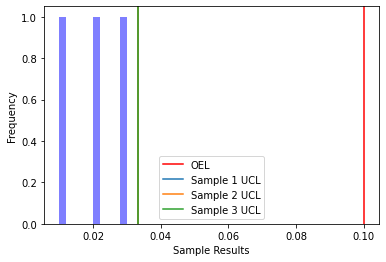

Uncertain sampling data. Execute a full characterization and implement controls.


In [20]:
import statistics as stats
import math
import matplotlib.pyplot as plt

# prompt user for modeling results
modeling_less_than_50_percent_oel = input('Was modeling performed and found to be less than 50% of OEL? (yes or no): ').lower() == 'yes'

if modeling_less_than_50_percent_oel:
    print('Exposure is acceptable.')
else:
    # prompt user to enter three screening samples
    samples = []
    for i in range(3):
        sample = float(input(f'Enter result for sample {i+1}: '))
        samples.append(sample)

    # calculate statistics for screening samples
    sample_mean = stats.mean(samples)
    sample_stdev = stats.stdev(samples)
    t_value = 2.306  # t-distribution value for 95% confidence interval with 2 degrees of freedom

    # calculate upper confidence limits (UCL) for each sample
    ucls = [sample_mean + t_value * (sample_stdev / math.sqrt(3)) for i in range(3)]

    # prompt user to enter OEL
    oel = float(input('Enter the occupational exposure limit (OEL): '))

    # plot histogram with UCL and OEL
    num_bins = 10
    plt.hist(samples, bins=num_bins, alpha=0.5, color='blue')
    plt.axvline(x=oel, color='red', label='OEL')
    for i, ucl in enumerate(ucls):
        plt.axvline(x=ucl, color=f'C{i}', label=f'Sample {i+1} UCL')
    plt.xlabel('Sample Results')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # check if any UCL is above the OEL
    if any(ucl >= oel for ucl in ucls):
        print('Unacceptable sampling data. Controls should be implemented.')
    elif any(ucl >= 0.1 * oel for ucl in ucls):
        print('Uncertain sampling data. Execute a full characterization and implement controls.')
    else:
        print('Acceptable sampling data. No further action required.') 
